The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[9.421, 9.274, 9.219, 8.864]


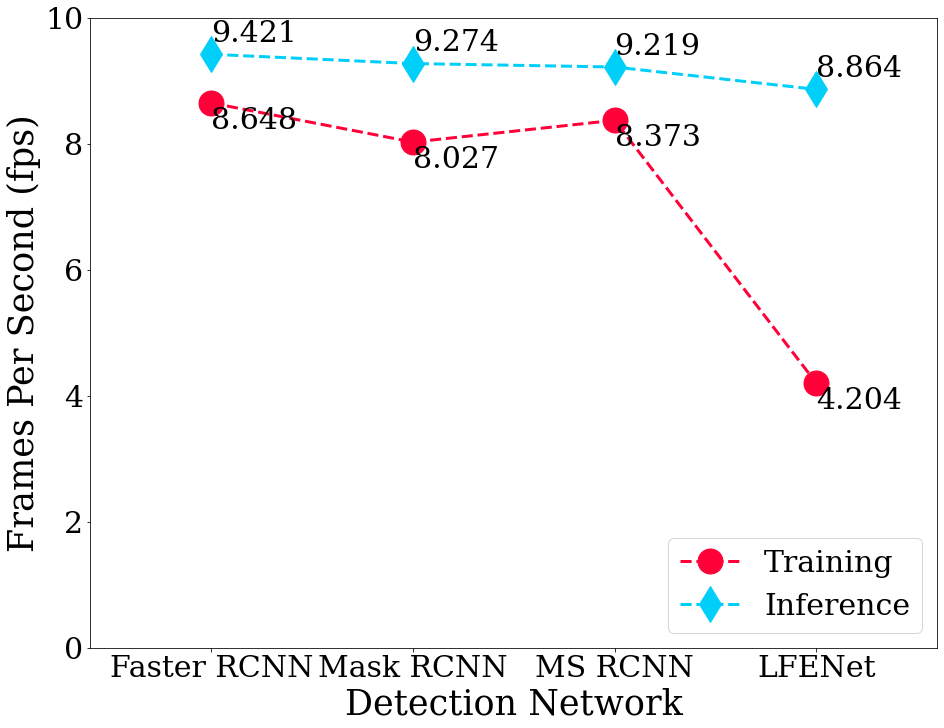

In [1]:
#coding=utf-8
import re
import matplotlib.pyplot as plt
import numpy as np
import json


# 正则表达式取log文件中需要的值
def readlog(log_fn):
    time = []
    with open(log_fn, 'r') as f:
        lines = f.readlines()
        # print(len(lines))
        # temp = re.search(', time: (\d+(\.\d+)?),', lines[20])
        # print("temp:", temp.group(1))
        for line in lines:
            if re.search(', time: (.*?),', line):
                temp = re.search(', time: (.*?),', line)
                # print("temp:", temp.group(1))
                time.append(float(temp.group(1))/2)

        # print(time)
        # print(len(time))

    return np.array(time)

# 正则表达式取log文件中需要的值
def readinferencelog(log_fn, prefix):
    time = []
    with open(log_fn, 'r') as f:
        lines = f.readlines()
        # print(len(lines))
        # temp = re.search(', time: (\d+(\.\d+)?),', lines[20])
        # print("temp:", temp.group(1))
        for line in lines:
            if re.search(prefix + ':(.*?)', line):
                
#                 temp = re.search(prefix + ': (.*?)', line)
#                 print("temp:", temp)
                time.append(float(line.split(':')[1]))

        # print(time)
        # print(len(time))

    return np.array(time)


# Json文件中的时间
def readJsonLog(log_dir):
    time = []
    with open(log_dir + '/None.log.json', 'r') as f:
        lines = f.readlines()
        for line in lines:
            jsoninfo = json.loads(line)
            if jsoninfo['mode'] == 'train':
                time.append(float(jsoninfo['time'])/2)
    return np.array(time)


if __name__ == "__main__":
    # 读取文件数值
#     log_fn1 = r"logs/faster_rcnn_r50_fpn_1x_public_202010020155"
#     log_fn2 = r"logs/mask_rcnn_r50_fpn_1x_public_202010010624"
#     log_fn3 = r"logs/ms_rcnn_r50_fpn_1x_public_202010100634"
#     log_fn4 = r"logs/xiaohei_faster_rcnn_r50_fpn_1x_public_202010020208"
#     time1 = readJsonLog(log_fn1)
#     time2 = readJsonLog(log_fn2)
#     time3 = readJsonLog(log_fn3)
#     time4 = readJsonLog(log_fn4)

    log_fn5 = r"logs/faster_rcnn_r50_fpn_1x_chenzhou_202011260631"
    log_fn6 = r"logs/mask_rcnn_r50_fpn_1x_chenzhou_202011250925"
    log_fn7 = r"logs/ms_rcnn_r50_fpn_1x_chenzhou_202011251546"
    log_fn8 = r"logs/xiaohei_faster_rcnn_r50_fpn_1x_chenzhou_202011141101"
    time5 = readJsonLog(log_fn5)
    time6 = readJsonLog(log_fn6)
    time7 = readJsonLog(log_fn7)
    time8 = readJsonLog(log_fn8)
    
    log_fn9 = r"logs/processInference-inferenceTime.log"
    time9 = readinferencelog(log_fn9, 'faster')
    time10 = readinferencelog(log_fn9, 'mask')
    time11 = readinferencelog(log_fn9, 'ms')
    time12 = readinferencelog(log_fn9, 'xiaohei')
    
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

    # 柱状图标数字
    def autolabel1(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax1.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=13)
    def autolabel2(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax2.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=13)
            
    def autolabel3(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax3.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=13)
            
    def autolabel4(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        print(rects)
        for rect in rects:
            print(rect)
            print(rect.get_ydata)
            height = rect.get_y()
            ax4.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=13)

    # 柱状图
    labels = ['Faster RCNN', 'Mask RCNN', 'MS RCNN', 'LFENet']

#     means_public = [round(1/time1.mean(), 3), round(1/time2.mean(), 3), round(1/time3.mean(), 3), round(1/time4.mean(), 3)]     #public 均值
    means_chenzhou = [round(1/time5.mean(), 3), round(1/time6.mean(), 3), round(1/time7.mean(), 3), round(1/time8.mean(), 3)]   #chenzhou 均值
    means_chenzhouin = [round((1/time9.mean()) + 1.7, 3), round(1/time10.mean(), 3), round(1/time11.mean(), 3), round(1/time12.mean(), 3)]   #chenzhou 均值
    print(means_chenzhouin)
    width = 0.7  # the width of the bars

    fig, ax = plt.subplots(figsize=(13,10), constrained_layout=True)

    line1 = ax.plot(labels, means_chenzhou, color='#FF0038', marker='o', linestyle='dashed', linewidth=3, markersize=25)
    line2 = ax.plot(labels, means_chenzhouin, color='#00CFFA', marker='d', linestyle='dashed', linewidth=3, markersize=25)

    for d, l, r in zip(labels, means_chenzhouin, means_chenzhouin):
        ax.text(d, l +0.2, r,  fontsize=30, style='normal')
    for d, l, r in zip(labels, means_chenzhou, means_chenzhou):
        ax.text(d, l - 0.4, r,  fontsize=30, style='normal')
    ax.tick_params(labelsize=30)
    ax.set_xlabel('Detection Network', fontsize=35)
    ax.set_ylabel('Frames Per Second (fps)', fontsize=35)
    plt.ylim(0, 10)
    ax.legend(labels=['Training','Inference'],loc='lower right', fontsize=30)
                    
    ax.margins(0.2)
    plt.savefig('logs/different_time.eps', format='eps', dpi=1000)


    plt.show()